In [9]:
import pandas as pd
import matplotlib as plt
import os
import itertools
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams
import re
from collections import Counter

import nltk
from nltk.corpus import stopwords

import requests
import json

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings("ignore")
t20_world_cup=pd.read_csv("/kaggle/input/cricket-all-tweets-t20-wc/tweets_all.csv")

In [10]:
t20_world_cup.drop(t20_world_cup.columns[[0]], axis=1, inplace=True)
t20_world_cup['Date'] = t20_world_cup['Date'].astype('string')
t20_world_cup['Tweet'] = t20_world_cup['Tweet'].astype('string')
t20_world_cup

,Date,User,Tweet,Hashtags
0,2022-11-11 23:58:29+00:00,DeafMango,Shadab is as cool as a cucumber. Ice in this m...,"['T20WorldCup', 'T20WorldCupFinal']"
1,2022-11-11 23:57:58+00:00,ImRockey26,5 IPL trophies doesn't make u the best captai...,"['PRteam', 'TeamIndia', 'T20WorldCup', 'BCCI']"
2,2022-11-11 23:57:21+00:00,nellbergcricket,Hales showing no respect for the sanctity of t...,['T20WorldCup']
3,2022-11-11 23:56:19+00:00,humanhumanright,Epic man! Brilliant #PakVsEngFinal #T20WorldCu...,"['PakVsEngFinal', 'T20WorldCup', 'T20WorldCupF..."
4,2022-11-11 23:49:37+00:00,wakandaRs,Indian Team should have coach's like 1- T20 -...,"['INDvsENG', 'T20WorldCup']"
...,...,...,...,...
525903,2022-10-15 00:14:51+00:00,cricketcomau,Australia's clash with New Zealand to start th...,['T20WorldCup']
525904,2022-10-15 00:13:36+00:00,TGBOND007,@Cricketracker @GautamGambhir You need a King ...,"['gesture', 'India', 'Cricket', 'T20WC', 'ICCT..."
525905,2022-10-15 00:12:41+00:00,viraj_jadhav,https://t.co/q7pY1N63QS #T20WorldCup,['T20WorldCup']
525906,2022-10-15 00:09:21+00:00,YousafCricket,Soumya Sarkar and Shoriful Islam have been add...,"['T20WorldCup', 'YousafCricket']"


In [11]:
def remove_special_chars(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

t20_world_cup['Tweet'].fillna('', inplace=True)

t20_world_cup['Tweet'] = t20_world_cup['Tweet'].astype(str)

t20_world_cup['Tweet'] = t20_world_cup['Tweet'].apply(remove_special_chars)

t20_world_cup

,Date,User,Tweet,Hashtags
0,2022-11-11 23:58:29+00:00,DeafMango,Shadab is as cool as a cucumber Ice in this ma...,"['T20WorldCup', 'T20WorldCupFinal']"
1,2022-11-11 23:57:58+00:00,ImRockey26,5 IPL trophies doesnt make u the best captain...,"['PRteam', 'TeamIndia', 'T20WorldCup', 'BCCI']"
2,2022-11-11 23:57:21+00:00,nellbergcricket,Hales showing no respect for the sanctity of t...,['T20WorldCup']
3,2022-11-11 23:56:19+00:00,humanhumanright,Epic man Brilliant PakVsEngFinal T20WorldCup T...,"['PakVsEngFinal', 'T20WorldCup', 'T20WorldCupF..."
4,2022-11-11 23:49:37+00:00,wakandaRs,Indian Team should have coachs like\n\n1 T20 ...,"['INDvsENG', 'T20WorldCup']"
...,...,...,...,...
525903,2022-10-15 00:14:51+00:00,cricketcomau,Australias clash with New Zealand to start the...,['T20WorldCup']
525904,2022-10-15 00:13:36+00:00,TGBOND007,Cricketracker GautamGambhir You need a King h...,"['gesture', 'India', 'Cricket', 'T20WC', 'ICCT..."
525905,2022-10-15 00:12:41+00:00,viraj_jadhav,httpstcoq7pY1N63QS\n\nT20WorldCup,['T20WorldCup']
525906,2022-10-15 00:09:21+00:00,YousafCricket,Soumya Sarkar and Shoriful Islam have been add...,"['T20WorldCup', 'YousafCricket']"


In [12]:
t20_world_cup['Date']=t20_world_cup['Date'].str[:10]
t20_world_cup

,Date,User,Tweet,Hashtags
0,2022-11-11,DeafMango,Shadab is as cool as a cucumber Ice in this ma...,"['T20WorldCup', 'T20WorldCupFinal']"
1,2022-11-11,ImRockey26,5 IPL trophies doesnt make u the best captain...,"['PRteam', 'TeamIndia', 'T20WorldCup', 'BCCI']"
2,2022-11-11,nellbergcricket,Hales showing no respect for the sanctity of t...,['T20WorldCup']
3,2022-11-11,humanhumanright,Epic man Brilliant PakVsEngFinal T20WorldCup T...,"['PakVsEngFinal', 'T20WorldCup', 'T20WorldCupF..."
4,2022-11-11,wakandaRs,Indian Team should have coachs like\n\n1 T20 ...,"['INDvsENG', 'T20WorldCup']"
...,...,...,...,...
525903,2022-10-15,cricketcomau,Australias clash with New Zealand to start the...,['T20WorldCup']
525904,2022-10-15,TGBOND007,Cricketracker GautamGambhir You need a King h...,"['gesture', 'India', 'Cricket', 'T20WC', 'ICCT..."
525905,2022-10-15,viraj_jadhav,httpstcoq7pY1N63QS\n\nT20WorldCup,['T20WorldCup']
525906,2022-10-15,YousafCricket,Soumya Sarkar and Shoriful Islam have been add...,"['T20WorldCup', 'YousafCricket']"


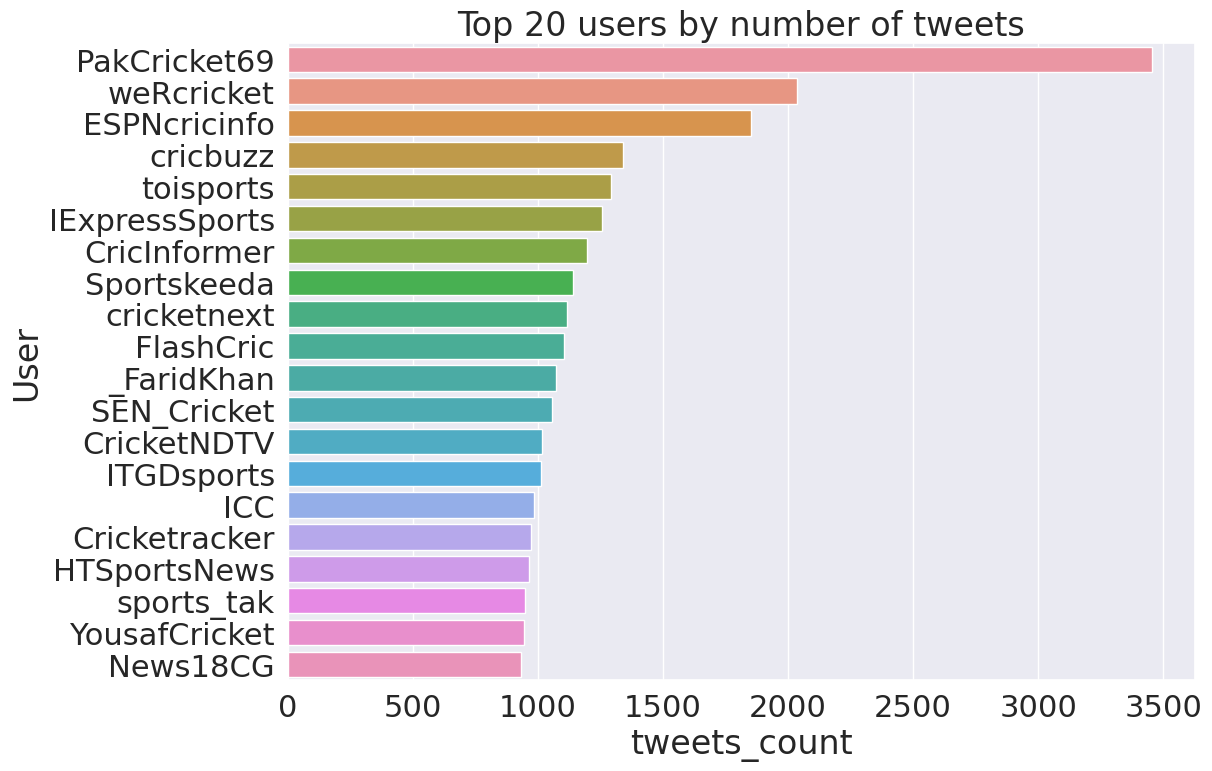

In [13]:
ds = t20_world_cup['User'].value_counts().reset_index()
ds.columns = ['User', 'tweets_count']
ds = ds.sort_values(['tweets_count'],ascending=False)
t20_world_cup = pd.merge(t20_world_cup, ds, on='User')
sns. set(font_scale=2) 
fig = sns.barplot( 
    x=ds.head(20)["tweets_count"], 
    y=ds.head(20)["User"], 
    orientation='horizontal'
).set_title('Top 20 users by number of tweets')

In [14]:
t20_world_cup['Date'] = pd.to_datetime(t20_world_cup['Date'])
t20_world_cup['Day_num'] = t20_world_cup['Date'].rank(method='dense').astype(int)
t20_world_cup.head()

,Date,User,Tweet,Hashtags,tweets_count,Day_num
0,2022-11-11,DeafMango,Shadab is as cool as a cucumber Ice in this ma...,"['T20WorldCup', 'T20WorldCupFinal']",201,28
1,2022-11-11,DeafMango,Dear ICC just move the final to Docklands Stad...,"['T20WorldCupFinal', 'T20WorldCup']",201,28
2,2022-11-10,DeafMango,We were live for a good 87 mins All three of u...,['T20WorldCup'],201,27
3,2022-11-10,DeafMango,Looking for an alternative to the jhantu space...,['T20WorldCup'],201,27
4,2022-11-10,DeafMango,England had been scrappy at best in this T20Wo...,['T20WorldCup'],201,27


In [30]:
tab = pd.DataFrame(columns=['Team Name', 'Positive', 'Negative', 'Neutral'])
type(t20_world_cup['Hashtags'][0])
from textblob import TextBlob
def table_data(keyword, df, tab):
    pos=0
    neg=0
    neu=0
    df_filtered = df[ ( df['Tweet'].str.contains(keyword, case=False) | df['Hashtags'].str.contains('#' + keyword, case=False))]
    for t in df_filtered['Tweet']:
        analysis = TextBlob(t)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            pos+=1
        elif polarity == 0:
            neu+=1
        else:
            neg+=1
    df2={'Team Name': keyword, 'Positive': pos, 'Negative': neg, 'Neutral': neu}
    tab = tab.append(df2, ignore_index = True)
    return tab

In [31]:
tab=table_data('India', t20_world_cup, tab)
tab=table_data('Australia', t20_world_cup, tab)
tab=table_data('New Zealand', t20_world_cup, tab)
tab=table_data('England', t20_world_cup, tab)
tab=table_data('Pakistan', t20_world_cup, tab)
tab=table_data('Bangladesh', t20_world_cup, tab)
tab=table_data('South Africa', t20_world_cup, tab)
tab=table_data('Afghanistan', t20_world_cup, tab)
tab=table_data('Sri Lanka', t20_world_cup, tab)
tab=table_data('Zimbabwe', t20_world_cup, tab)
tab=table_data('Netherlands', t20_world_cup, tab)
tab=table_data('Ireland', t20_world_cup, tab)
tab=table_data('Scotland', t20_world_cup, tab)
tab=table_data('West Indies', t20_world_cup, tab)
tab=table_data('Namibia', t20_world_cup, tab)
tab=table_data('UAE', t20_world_cup, tab)
tab

,Team Name,Positive,Negative,Neutral
0,India,47170,12364,53755
1,Australia,11230,3019,7858
2,New Zealand,10034,932,23
3,England,15945,3741,13012
4,Pakistan,34994,8539,34647
5,Bangladesh,7761,2045,6137
6,South Africa,6759,1920,5164
7,Afghanistan,3324,833,1870
8,Sri Lanka,5475,1075,2686
9,Zimbabwe,8170,2122,6592


In [32]:
def result_calculator(days, keyword, df):
    pos=0
    neg=0
    neu=0
    for d in days:
        df_filtered = df[ ( (df['Day_num'] == d) & (df['Tweet'].str.contains(keyword, case=False) | df['Hashtags'].str.contains('#' + keyword, case=False)))]
        for t in df_filtered['Tweet']:
            analysis = TextBlob(t)
            polarity = analysis.sentiment.polarity
            if polarity > 0:
                pos+=1
            elif polarity == 0:
                neu+=1
            else:
                neg+=1
    return [(pos/(pos+neg+neu)),(neg/(pos+neg+neu))]

In [19]:
res = pd.DataFrame(columns=['Match_No', 'Team1', 'Team2', 'Home_Pos', 'Home_Neg', 'Away_Pos', 'Away_Neg'])
res.head()

,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg


In [20]:
def predict_match(m,t1,t2,days,res,df):
    met1=result_calculator(days,t1,df)
    met2=result_calculator(days,t2,df)
    df2={'Match_No': m, 'Team1': t1, 'Team2': t2, 'Home_Pos': met1[0], 'Home_Neg': met1[1], 'Away_Pos': met2[0], 'Away_Neg': met2[1]}
    res = res.append(df2, ignore_index = True)
    return res

In [21]:
res = predict_match(1,'Namibia','Sri Lanka',[1], res, t20_world_cup)

In [22]:
res

,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg
0,1,Namibia,Sri Lanka,0.380165,0.132231,0.426087,0.104348


In [23]:
res = predict_match(2,'UAE','Netherlands',[1], res, t20_world_cup)

In [24]:
res

,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg
0,1,Namibia,Sri Lanka,0.380165,0.132231,0.426087,0.104348
1,2,UAE,Netherlands,0.565789,0.092105,0.488889,0.155556


In [25]:
res = predict_match(3,'Scotland','West Indies',[2], res, t20_world_cup)
res = predict_match(4,'Zimbabwe','Ireland',[2], res, t20_world_cup)
res = predict_match(5,'Namibia','Netherlands',[3], res, t20_world_cup)
res = predict_match(6,'Sri Lanka','UAE',[3], res, t20_world_cup)
res = predict_match(7,'Scotland','Ireland',[4], res, t20_world_cup)
res = predict_match(8,'West Indies','Zimbabwe',[4], res, t20_world_cup)
res = predict_match(9,'Sri Lanka','Netherlands',[5], res, t20_world_cup)
res = predict_match(10,'UAE','Namibia',[5], res, t20_world_cup)
res = predict_match(11,'West Indies','Ireland',[6], res, t20_world_cup)
res = predict_match(12,'Scotland','Zimbabwe',[6], res, t20_world_cup)
res = predict_match(13,'New Zealand','Australia',[7], res, t20_world_cup)
res = predict_match(14,'Afghanistan','England',[7], res, t20_world_cup)
res = predict_match(15,'Ireland','Sri Lanka',[8], res, t20_world_cup)
res = predict_match(16,'Pakistan','India',[8], res, t20_world_cup)
res = predict_match(17,'Bangladesh','Netherlands',[9], res, t20_world_cup)
res = predict_match(18,'Zimbabwe','South Africa',[9], res, t20_world_cup)
res = predict_match(19,'Sri Lanka','Australia',[10], res, t20_world_cup)
res = predict_match(20,'Ireland','England',[11], res, t20_world_cup)
res = predict_match(21,'New Zealand','Afghanistan',[11], res, t20_world_cup)
res = predict_match(22,'South Africa','Bangladesh',[12], res, t20_world_cup)
res = predict_match(23,'India','Netherlands',[12], res, t20_world_cup)
res = predict_match(24,'Zimbabwe','Pakistan',[12], res, t20_world_cup)
res = predict_match(25,'Afghanistan','Ireland',[13], res, t20_world_cup)
res = predict_match(26,'Australia','England',[13], res, t20_world_cup)
res = predict_match(27,'New Zealand','Sri Lanka',[13], res, t20_world_cup)
res = predict_match(28,'Bangladesh','Zimbabwe',[14], res, t20_world_cup)
res = predict_match(29,'Netherlands','Pakistan',[14], res, t20_world_cup)
res = predict_match(30,'India','South Africa',[14], res, t20_world_cup)
res = predict_match(31,'Australia','Ireland',[15], res, t20_world_cup)
res = predict_match(32,'Afghanistan','Sri Lanka',[16], res, t20_world_cup)
res = predict_match(33,'England','New Zealand',[16], res, t20_world_cup)
res = predict_match(34,'Zimbabwe','Netherlands',[17], res, t20_world_cup)
res = predict_match(35,'India','Bangladesh',[17], res, t20_world_cup)
res = predict_match(36,'Pakistan','South Africa',[18], res, t20_world_cup)
res = predict_match(37,'New Zealand','Ireland',[19], res, t20_world_cup)
res = predict_match(38,'Australia','Afghanistan',[19], res, t20_world_cup)
res = predict_match(39,'Sri Lanka','England',[20], res, t20_world_cup)
res = predict_match(40,'Netherlands','South Africa',[21], res, t20_world_cup)
res = predict_match(41,'Bangladesh','Pakistan',[21], res, t20_world_cup)
res = predict_match(42,'India','Zimbabwe',[21], res, t20_world_cup)
res = predict_match(43,'New Zealand','Pakistan',[22,23,24], res, t20_world_cup)
res = predict_match(44,'India','England',[25], res, t20_world_cup)
res = predict_match(45,'Pakistan','England',[26,27,28], res, t20_world_cup)

In [26]:
res

,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg
0,1,Namibia,Sri Lanka,0.380165,0.132231,0.426087,0.104348
1,2,UAE,Netherlands,0.565789,0.092105,0.488889,0.155556
2,3,Scotland,West Indies,0.444444,0.236111,0.539683,0.174603
3,4,Zimbabwe,Ireland,0.500000,0.147059,0.629630,0.098765
4,5,Namibia,Netherlands,0.578288,0.100209,0.658228,0.088608
5,6,Sri Lanka,UAE,0.543860,0.118421,0.547170,0.103774
6,7,Scotland,Ireland,0.454545,0.113636,0.507692,0.092308
7,8,West Indies,Zimbabwe,0.577465,0.126761,0.447761,0.119403
8,9,Sri Lanka,Netherlands,0.447205,0.236025,0.559140,0.129032
9,10,UAE,Namibia,0.535211,0.084507,0.636364,0.090909


In [27]:
res.to_csv('WC_Sentiment.csv')

In [28]:
import numpy as np
results=np.array([0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,2,1,0,2,0,0,0,2,2,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1])
res['result']=results.tolist()
res

,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg,result
0,1,Namibia,Sri Lanka,0.380165,0.132231,0.426087,0.104348,0
1,2,UAE,Netherlands,0.565789,0.092105,0.488889,0.155556,1
2,3,Scotland,West Indies,0.444444,0.236111,0.539683,0.174603,0
3,4,Zimbabwe,Ireland,0.500000,0.147059,0.629630,0.098765,0
4,5,Namibia,Netherlands,0.578288,0.100209,0.658228,0.088608,1
5,6,Sri Lanka,UAE,0.543860,0.118421,0.547170,0.103774,0
6,7,Scotland,Ireland,0.454545,0.113636,0.507692,0.092308,1
7,8,West Indies,Zimbabwe,0.577465,0.126761,0.447761,0.119403,0
8,9,Sri Lanka,Netherlands,0.447205,0.236025,0.559140,0.129032,0
9,10,UAE,Namibia,0.535211,0.084507,0.636364,0.090909,0


In [29]:
res.to_csv('WC_Sentiment.csv')